# Рубежный контроль №2

# Чевик Джанер ИУ5И-61Б

## Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Линейная/логистическая регрессия
- Метод №2: Случайный лес

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Загрузка датасета
data = pd.read_csv("houses_to_rent.csv")

In [43]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Предобработка данных 

In [44]:
#Проверка типов данных
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [45]:
#Размер датасета
data.shape

(10692, 13)

In [46]:
#Проверка пустых значений
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [47]:
# Избавимся от выбросов
data = data[data['total (R$)'] <= 20000]

In [48]:
# Уберем все остальные стоимости, нас будет интересовать только общая
cols_drop = ['hoa (R$)', 'rent amount (R$)','property tax (R$)', 'fire insurance (R$)']
data = data.drop(cols_drop, axis = 1)

In [49]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [50]:
#Проверка типов данных
data.dtypes

city              int32
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int32
animal            int32
furniture         int32
total (R$)        int64
dtype: object

In [51]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,4,70,2,1,1,32,0,0,5618
1,4,320,4,4,0,13,0,1,7973
2,2,80,1,1,1,31,0,1,3841
3,2,51,2,1,0,12,0,1,1421
4,4,25,1,1,0,1,1,1,836


<Axes: >

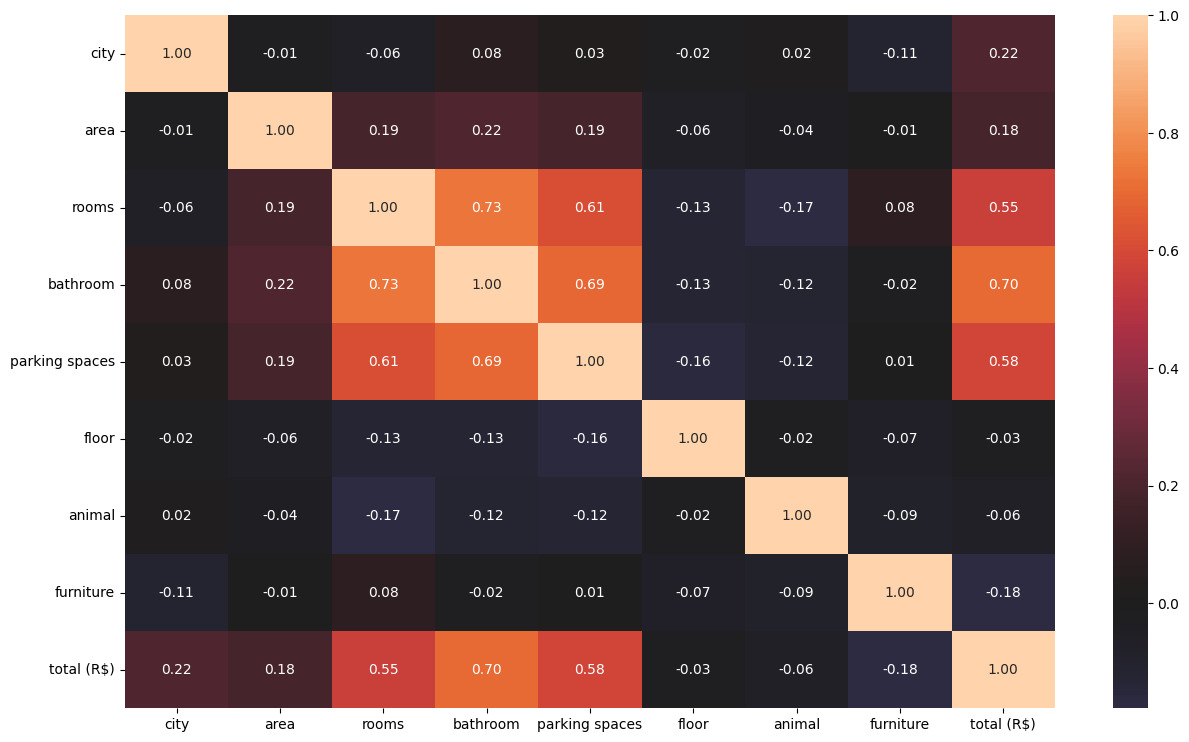

In [52]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

In [53]:
#Разделение выборки на обучающую и тестовую
target = "total (R$)"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия

In [54]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

Для оценки качества будем использовать:
- коэффициента детерминации, чтобы узнать насколько модель близка к высококачественной
- корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели

In [55]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = root_mean_squared_error(testY, LR.predict(testX))

In [56]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Оценка качества модели с помощью коэффициента детерминации: 0.5801263526088816
Корень из средней квадратичной ошибки: 2706.3187298133025


С помощью используемых метрик, можем сделать вывод, что качество модели недостаточно высокое, так как целевой признак слабо коррелирует с другими параметрами

### Случайный лес

In [57]:
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [58]:
R2_RT = r2_score(testY, RT.predict(testX))

In [59]:
RMSE_RT= root_mean_squared_error(testY, RT.predict(testX))

In [60]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.6451758436407691
Корень из средней квадратичной ошибки: 2487.8616394750916


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает значения с большей точностью в отличие от модели линейной регрессии. Мы видим более низкий показатель RMSE и более высокий R2, этот результат можно считать достаточно логичным